# Predição de custos de casas em Boston utilizando machine learning

##### Projeto destino a explorar banco de dados de casas em boston e atráves de técnicas de machine learning, entender qual o melhor algorítimo para prever os custos de casas tendo em vista as suas características

##### Passo a passo que será seguido nesse projeto:
1) Importe de bibliotecas e Banco de dados
2) análise gráfica do banco de dados
3) Estabelecendo modelos através de regressão
4) estabelecendo um modelo através de árvore decisória

#### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

### Importando e ajustando Banco de dados:
###### CRIM per capita crime rate by town 
###### ZN proportion of residential land zoned for lots over 25,000 sq.ft.
###### INDUS proportion of non-retail business acres per town
###### CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
###### NOX nitric oxides concentration (parts per 10 million)
###### RM average number of rooms per dwelling
###### AGE proportion of owner-occupied units built prior to 1940
###### DIS weighted distances to five Boston employment centres
###### RAD index of accessibility to radial highways
###### TAX full-value property-tax rate per 10,000 dolars
###### PTRATIO pupil-teacher ratio by town
###### B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
###### LSTAT % lower status of the population
###### MEDV Median value of owner-occupied homes in 1000 dolars

In [2]:
data = pd.read_csv('housing.csv', sep='\s+',header=None)
data.columns=['CRIM', 'ZN',  'INDUS',  'CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B1000','LSTAT','MEDV']
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO   B1000  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Análise exploratória dos dados:
1) Estatística descritiva
2) Análise Gráfica
3) Correlações entre os termos

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       B1000  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Text(0.5, 1.0, 'Correlações entre os termos')

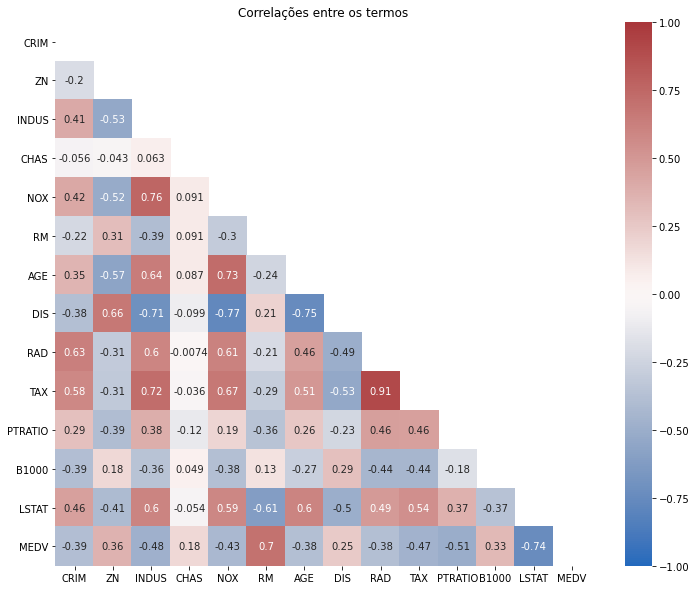

In [3]:
# Medidas de Estatística descritiva,Correlação entre os termos e #Análise Gráfica
import matplotlib.pyplot as plt

#análise descritiva ddos dados
data_description = data.describe()
print(data_description)

#correlação entre membros
data_corr = data.corr()

#plotando a matriz de correlações:
mask = np.zeros_like(data_corr)
mask[np.triu_indices_from(mask)] = True
ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(data.corr(),vmin = -1, vmax = 1, cmap = "vlag", annot=True ,mask=mask)

ax.set_title('Correlações entre os termos')

### Dividindo o Banco de dados em testes e treino

In [4]:
#importando bibliotecas utilizadas para fazer a regressão, sperar o banco de dados em banco de dados de teste e treino, e medir a acuracidade do modelo
from sklearn.model_selection import train_test_split

#Estabelecendo uma Seed para que o experimento seja replicável
SEED = 20

#Separando Xs e Ys:
x = data[data.columns[:13]] #colocando até qual coluna são as entradas (X)
y = data[data.columns[13:]] #colocando qual coluna é a saída (Y)

#Plotando xs e Ys
print(f'Nome das colunas = {data.columns[:]}')
print(f'x = {x.head(2)}')
print(f'y = {y.head(2)}')

#Separando em banco de dados de treino e banco de dados de teste

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = SEED )

print('0.25 do dado será utilizado para teste')

print(f'tamanho de X = {x.shape} , Tamanho de Y = {y.shape} , Tamanho de X de treino = {X_train.shape} , Tamanho de X de teste = {X_test.shape} ,Tamanho de Y treino = {y_train.shape} , Tamanho de Y de teste = {y_test.shape}')


Nome das colunas = Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B1000', 'LSTAT', 'MEDV'],
      dtype='object')
x =       CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   

   PTRATIO  B1000  LSTAT  
0     15.3  396.9   4.98  
1     17.8  396.9   9.14  
y =    MEDV
0  24.0
1  21.6
0.25 do dado será utilizado para teste
tamanho de X = (506, 13) , Tamanho de Y = (506, 1) , Tamanho de X de treino = (379, 13) , Tamanho de X de teste = (127, 13) ,Tamanho de Y treino = (379, 1) , Tamanho de Y de teste = (127, 1)


### Fazendo Regressão Linear Multipla

In [5]:
## ANálise de correlação multipla:
# Necessário ter X_train, X_test, y_train, y_test

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
coeficientes_lineares = reg.coef_
termo_independete = reg.intercept_ 

print(f'Os coeficientes Lineares da equação são {reg.coef_}')
print(f'o termo independete da equação é:  {reg.intercept_ }')

### Fazendo a predição do Modelo:

y_pred = reg.predict(X_test)


### Analisando o R^2 do modelo:
accuracy_linear_regression = reg.score(X_train,y_train)

print(f'O R^2 da Equação, ou "Score" é: {accuracy_linear_regression}' )


Os coeficientes Lineares da equação são [[-5.76878557e-02  3.46704665e-02  3.40224233e-02  3.10628230e+00
  -2.00714513e+01  4.33726203e+00  8.33421170e-03 -1.31765787e+00
   2.37004632e-01 -1.02897618e-02 -8.54705250e-01  9.70928717e-03
  -4.87796034e-01]]
o termo independete da equação é:  [30.55552275]
O R^2 da Equação, ou "Score" é: 0.7419182949166911


### Fazendo Modelo preditivo por árvore decisória

a Acurácia do modelo é de:0.7349688329434099


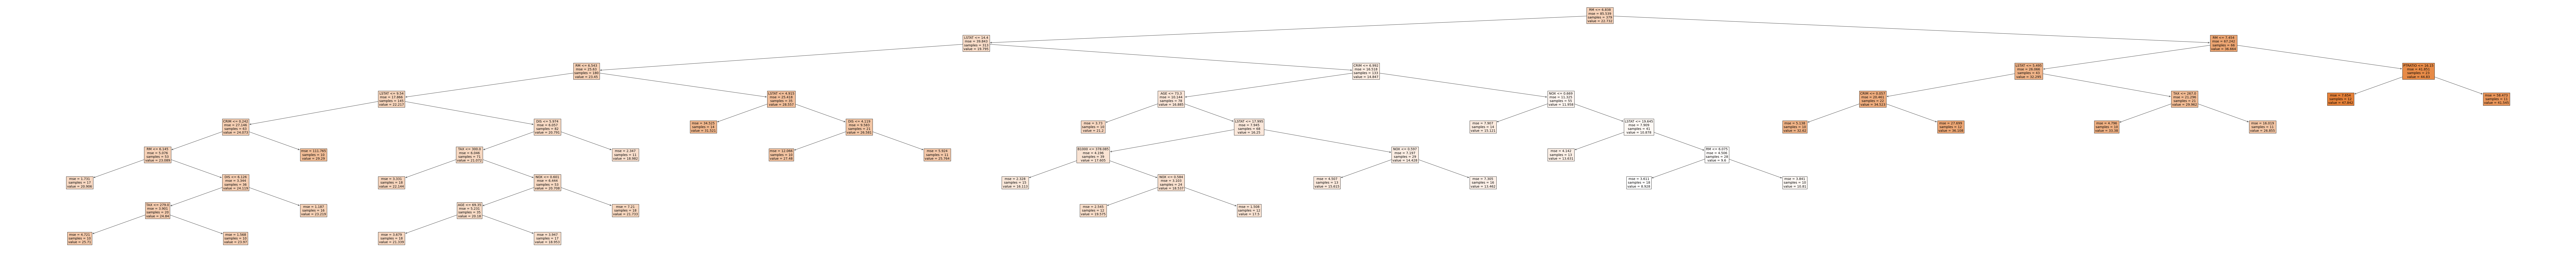

In [63]:
## Importando Biblioteca:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

### Propriedades da árvore de decisão
SEED = 20
Max_nos = 10
Min_conjunto_por_nos= 10



## Rodando o Modelo:
reg = DecisionTreeRegressor(max_depth=Max_nos, min_samples_leaf = Min_conjunto_por_nos )
reg.fit(X_train,y_train)

## Fazendo a Predição do Modelo:
y_pred = reg.predict(X_test)

## Avaliando o Score do Modelo
accuracy = reg.score(X_test, y_test)
print(f'a Acurácia do modelo é de:{accuracy}' )
### Imprimindo propriedades importantes do modelo:


### Plotando a árvore decisória
import matplotlib.pyplot as plt
from sklearn import tree
fig_name_save = "Árvore 1"
feature_names = list(X_test) #nome das categorias de X para serem plotadas


#plt.figure(figsize= 200,100)
plt.figure(figsize = (200,20));
tree.plot_tree(reg,filled=True, fontsize = 14, feature_names=feature_names)
plt.savefig(fig_name_save)